{0: array([0.11873322, 0.50199681, 0.87693339]), 1: array([ 0.84755673,  0.57043933, -0.87693339]), 2: array([-0.03044893,  0.48798738,  1.23593063]), 3: array([0.10136859, 0.50036613, 0.91872027]), 4: array([ 0.69837457,  0.5564299 , -0.51793615]), 5: array([ 0.83019209,  0.56880864, -0.83514651]), 6: array([0.06163294, 0.49663463, 1.01434154]), 7: array([-0.13599126,  0.47807609,  1.48991145]), 8: array([ 1.20302132,  0.60382037, -1.73233602]), 9: array([ 1.13701049,  0.59762141, -1.5734852 ]), 10: array([-0.06063242,  0.4851529 ,  1.30856524]), 11: array([ 0.69382878,  0.55600301, -0.506997  ]), 12: array([-0.27235457,  0.46527045,  1.81806095]), 13: array([0.05708715, 0.49620774, 1.02528068]), 14: array([ 0.97500948,  0.58240819, -1.18364023]), 15: array([ 1.17283783,  0.60098589, -1.6597014 ]), 16: array([-0.20591039,  0.47151011,  1.65816732]), 17: array([ 1.50529393,  0.63220625, -2.45973556])}
[array([-0.27235457,  0.46527045,  1.81806095]), array([-0.20591039,  0.47151011,  1.

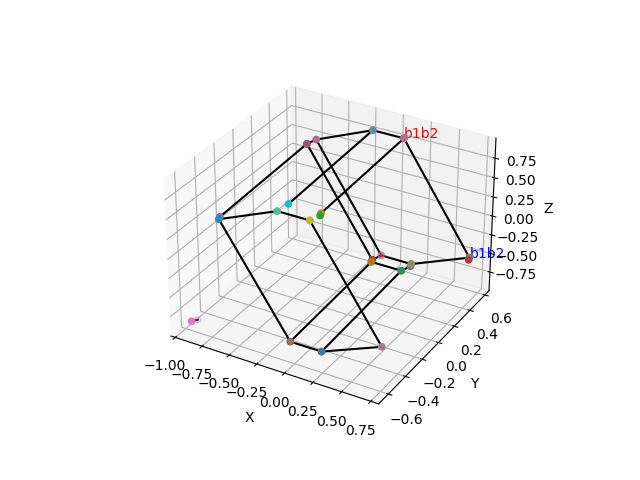

In [16]:
import os,sys,math,cmath
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits import mplot3d
from collections import Counter
#dclben06
b1 = np.array([0.860474569594575,0.0365159146990011,0.358997239874682])  #逆ベクトルの座標　　実格子からの変換も可能
b2 = np.array([0,1.07080545537165,0.0417868785140344])
b3 = np.array([0,0,1.75386677814264])

#dclben03
#b1 = np.array([0.728569725,0,0.559253269251954])
#b2 = np.array([0,1.04354514319541,0])
#b3 = np.array([0,0,1.06836291637273])

#dclben07
#b1=np.array([0.428476903108264,0,0.171118347866593])
#b2=np.array([0,1.09463158661665,0])
#b3=np.array([0,0,1.72374907314815])

pnum=10 #小数点保留位数　　小数点以下の桁数
renum=3 #重复点的最小值　　repid number 判断の根拠の１つ（物理的の意味は頂点は少なくとも3つの平面に接続している）
tolerance = 1e-4  # 容差值，根据实际情况进行调整


########################################################################################################################################################################
#ベクトルのリスト
vectors = [b1,b2,b3,-b1,-b2,-b3,b1+b2,b1+b3,b2+b3,b1-b2,b1-b3,b2-b3,b2-b1,b3-b1,b3-b2,-b1-b2,-b1-b3,-b2-b3,b1+b2+b3,b1+b2-b3,b1-b2+b3,-b1+b2+b3,b1-b2-b3,-b1+b2-b3,-b1-b2+b3,-b1-b2-b3]


#全ての三つの平面の交差点を計算、　result type dict  FBZ境界にある点は：vector(k) dot vector(G) = G^2/2 　　G　はリストの中
# result: **********result center********** len(result center[*][*])=2*(x,y,z) 

result={}
result_center={}
X={}
for i in range(len(vectors)):
    result[i]={}
    result_center[i]={}
    for j in range(i+1,len(vectors)):
        cross=np.cross(vectors[i],vectors[j])
        #if np.linalg.norm(cross) > tolerance:
        if np.linalg.norm(cross) != 0:
            n3=0
            for k in range(len(vectors)):
                rank=np.vstack((vectors[i],vectors[j],vectors[k])).T
                if np.linalg.matrix_rank(rank) == 3:
                    left=np.array([vectors[i],vectors[j],vectors[k]])
                    right=np.array([0.5*np.dot(vectors[i],vectors[i]),0.5*np.dot(vectors[j],vectors[j]),0.5*np.dot(vectors[k],vectors[k])])
                    solve=np.linalg.solve(left,right)
                    X[n3]=np.linalg.solve(left,right)
                    n3=n3+1
            #list_x=X.values()
            #sort=sort_result_by_x(X)
            x_values=[val for val in X.values()]
            sort=sorted(x_values, key=lambda v:v[0])
            midpoint=len(sort)//2-1
            result[i][j]=sort
            result_center[i][j]=sort[midpoint:midpoint+2]
            if i==0 and j==1:
                print(X)
                print(sort)
                print(result_center) 
                    
                       
#print(result[0][1][0])
#print(result[0][1])
#print(result_center[0][1])
#result 储存了所有的坐标值  result_center 取中心两点
#print(result_center[0][1][0][1])
#dictをlist化、座標の出現回数をcountする

from collections import Counter

point_list = [[[tuple([0]*3) for _ in range(2)] for j in range(len(vectors))] for i in range(len(vectors))]

for i in range(len(vectors)):
    for j in range(i+1, len(vectors)):
        cross = np.cross(vectors[i], vectors[j])
        #if np.linalg.norm(cross) > tolerance:
        if np.linalg.norm(cross) != 0:
            point_list[i][j] = np.around(tuple(result_center[i][j]),pnum)

coordinate_counts = Counter(tuple(point) for sublist in point_list for sublist2 in sublist for point in sublist2)

#print(coordinate_counts)



from mpl_toolkits.mplot3d import Axes3D



%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')

for i in range(len(vectors)):
    for j in range(i+1,len(vectors)):
        cross=np.cross(vectors[i],vectors[j])
        #if np.linalg.norm(cross) > tolerance:
        if np.linalg.norm(cross) != 0:
            x=[np.around(result_center[i][j][0][0],pnum),np.around(result_center[i][j][1][0],pnum)]
            y=[np.around(result_center[i][j][0][1],pnum),np.around(result_center[i][j][1][1],pnum)]
            z=[np.around(result_center[i][j][0][2],pnum),np.around(result_center[i][j][1][2],pnum)]
            if coordinate_counts.get(tuple(np.around(result_center[i][j][0], pnum)), 0) >= renum:
            #if coordinate_counts.get((np.around(result_center[i][j][0][0],pnum),np.around(result_center[i][j][0][1],pnum),np.around(result_center[i][j][0][2],pnum)),0)>=renum :  #3回以上出現の点を取って、描く
                ax.scatter(x,y,z)
                ax.plot([result_center[i][j][0][0],result_center[i][j][1][0]],[result_center[i][j][0][1],result_center[i][j][1][1]],[result_center[i][j][0][2],result_center[i][j][1][2]],color='black')
label='b1b2'
ax.text(result_center[0][1][0][0],result_center[0][1][0][1],result_center[0][1][0][2],label,color='red')
ax.text(result_center[0][1][1][0],result_center[0][1][1][1],result_center[0][1][1][2],label,color='blue')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

